In [1]:
# Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import OneHotEncoder

In [2]:
# Baca dataset
df = pd.read_csv('Employee Dataset.csv')

In [3]:
df.head(30)

,Education,JoiningYear,City,PaymentTier,Age,Gender,EverBenched,ExperienceInCurrentDomain,LeaveOrNot
0,Bachelors,2017,Bangalore,3,34,Male,No,0,0
1,Bachelors,2013,Pune,1,28,Female,No,3,1
2,Bachelors,2014,New Delhi,3,38,Female,No,2,0
3,Masters,2016,Bangalore,3,27,Male,No,5,1
4,Masters,2017,Pune,3,24,Male,Yes,2,1
5,Bachelors,2016,Bangalore,3,22,Male,No,0,0
6,Bachelors,2015,New Delhi,3,38,Male,No,0,0
7,Bachelors,2016,Bangalore,3,34,Female,No,2,1
8,Bachelors,2016,Pune,3,23,Male,No,1,0
9,Masters,2017,New Delhi,2,37,Male,No,2,0


In [4]:
# Melihat jumlah data yang hilang per kolom
missing_data = df.isnull().sum()
missing_data

Education                    0
JoiningYear                  0
City                         0
PaymentTier                  0
Age                          0
Gender                       0
EverBenched                  0
ExperienceInCurrentDomain    0
LeaveOrNot                   0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4653 entries, 0 to 4652
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Education                  4653 non-null   object
 1   JoiningYear                4653 non-null   int64 
 2   City                       4653 non-null   object
 3   PaymentTier                4653 non-null   int64 
 4   Age                        4653 non-null   int64 
 5   Gender                     4653 non-null   object
 6   EverBenched                4653 non-null   object
 7   ExperienceInCurrentDomain  4653 non-null   int64 
 8   LeaveOrNot                 4653 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 327.3+ KB


In [6]:
# Preprocessing data
# Encoding kolom kategorikal
encoder = OneHotEncoder(drop='first', sparse=False)
categorical_cols = ['Education', 'City', 'Gender', 'EverBenched']
df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

In [7]:
df_encoded.head()

,JoiningYear,PaymentTier,Age,ExperienceInCurrentDomain,LeaveOrNot,Education_Masters,Education_PHD,City_New Delhi,City_Pune,Gender_Male,EverBenched_Yes
0,2017,3,34,0,0,0,0,0,0,1,0
1,2013,1,28,3,1,0,0,0,1,0,0
2,2014,3,38,2,0,0,0,1,0,0,0
3,2016,3,27,5,1,1,0,0,0,1,0
4,2017,3,24,2,1,1,0,0,1,1,1


In [8]:
# Memisahkan fitur dan label
X = df_encoded.drop('LeaveOrNot', axis=1)
y = df_encoded['LeaveOrNot']

In [9]:
# Membagi data menjadi data latih dan uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Klasifikasi menggunakan KNN
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train, y_train)

KNeighborsClassifier()

In [11]:
# Klasifikasi menggunakan Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

GaussianNB()

In [12]:
# Melakukan prediksi dengan KNN
knn_predictions = knn_model.predict(X_test)
knn_predictions

array([0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

In [13]:
# Melakukan prediksi dengan Naive Bayes
nb_predictions = nb_model.predict(X_test)
nb_predictions

array([0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1,

In [14]:
# Menambahkan kolom prediksi ke DataFrame
df_results = pd.DataFrame(X_test)
df_results['Actual'] = y_test
df_results['KNN_Prediction'] = knn_predictions
df_results['NaiveBayes_Prediction'] = nb_predictions
df_results = df_results[['Actual','KNN_Prediction','NaiveBayes_Prediction']]
df_results.head(30)

,Actual,KNN_Prediction,NaiveBayes_Prediction
297,1,0,0
2705,0,0,0
501,1,0,0
1272,0,0,1
3956,0,0,0
322,1,0,0
1417,1,0,1
1034,1,1,1
1161,0,0,0
1094,1,1,1


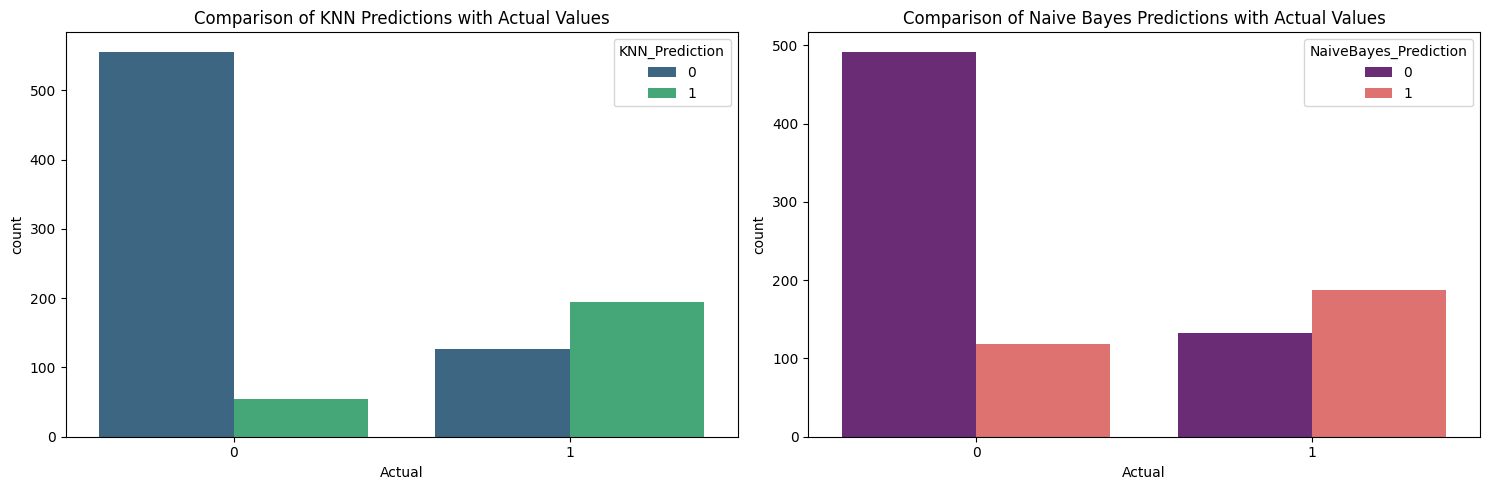

In [15]:
# Visualisasi hasil prediksi
plt.figure(figsize=(15, 5))

# Bar plot untuk KNN
plt.subplot(1, 2, 1)
sns.countplot(data=df_results, x='Actual', hue='KNN_Prediction', palette='viridis')
plt.title('Comparison of KNN Predictions with Actual Values')

# Bar plot untuk Naive Bayes
plt.subplot(1, 2, 2)
sns.countplot(data=df_results, x='Actual', hue='NaiveBayes_Prediction', palette='magma')
plt.title('Comparison of Naive Bayes Predictions with Actual Values')

plt.tight_layout()
plt.show()

In [16]:
# Evaluasi kinerja model
knn_accuracy = accuracy_score(y_test, knn_predictions)
nb_accuracy = accuracy_score(y_test, nb_predictions)

In [17]:
# Bandingkan akurasi KNN dan Naive Bayes
print(f'KNN Accuracy: {knn_accuracy}')
print(f'Naive Bayes Accuracy: {nb_accuracy}')

KNN Accuracy: 0.8055853920515574
Naive Bayes Accuracy: 0.7303974221267454


In [18]:
# Simpan hasil akurasi ke dalam DataFrame
accuracy_df = pd.DataFrame({
    'Model': ['KNN', 'Naive Bayes'],
    'Accuracy': [knn_accuracy, nb_accuracy]
})

# Tampilkan hasil akurasi dalam persentase
accuracy_df['Accuracy'] = accuracy_df['Accuracy'] * 100
accuracy_df

,Model,Accuracy
0,KNN,80.558539
1,Naive Bayes,73.039742
